ANALYSIS:

Urban cities have the highest number of rides and drivers, followed by suburban, and then rural

Fares in urban settings are lower than suburban and rural settings and are more uniformly distributed.This is presumably because urban settings are more concentrated and the trips are shorter reslting in smaller fares

Fares in rural settings are more widely distributed than fares in urban and suburban settings, and have the greatest average fare than urban and suburban settings 

In [2]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data
city_df=pd.read_csv(city_data_to_load)
ride_df=pd.read_csv(ride_data_to_load)

# Combine the data into a single dataset
pyber_raw=pd.merge(ride_df, city_df, on='city', how='outer')
pyber_raw["total fare"]=pyber_raw["fare"]

# Display the data table for preview
pyber_raw.head()

,city,date,fare,ride_id,driver_count,type,total fare
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban,13.83
1,Lake Jonathanshire,2018-04-07 20:51:11,31.25,4441251834598,5,Urban,31.25
2,Lake Jonathanshire,2018-03-09 23:45:55,19.89,2389495660448,5,Urban,19.89
3,Lake Jonathanshire,2018-04-07 18:09:21,24.28,7796805191168,5,Urban,24.28
4,Lake Jonathanshire,2018-01-02 14:14:50,13.89,424254840012,5,Urban,13.89


In [3]:
agg_dict={'fare':np.mean,
          'ride_id':np.size,
         'driver_count':np.unique,
         'total fare': np.sum}

columns={'fare': 'Average Fare',
        'ride_id': 'Total Number of Rides',
        'driver_count': 'Driver Count',
        'total fare': 'Total Fare'}

#create a dataframe grouped by type and city and perform functions above
pyber_final=pyber_raw.groupby(['type','city'], as_index=False).agg(agg_dict).rename(columns=columns)

rural_df=pyber_final[pyber_final['type']=="Rural"]
suburban_df=pyber_final[pyber_final['type']=="Suburban"]
urban_df=pyber_final[pyber_final['type']=="Urban"]

## Bubble Plot of Ride Sharing Data

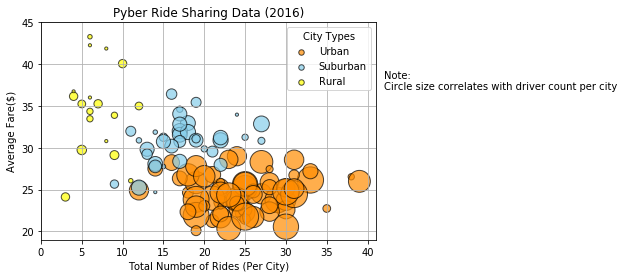

In [11]:
# Obtain the x and y coordinates for each of the three city types
x_urban=urban_df["Total Number of Rides"]
y_urban=urban_df["Average Fare"]
s_urban=urban_df["Driver Count"]
l_urban="Urban"

x_suburban=suburban_df["Total Number of Rides"]
y_suburban=suburban_df["Average Fare"]
s_suburban=suburban_df["Driver Count"]
l_suburban="Suburban"

x_rural=rural_df["Total Number of Rides"]
y_rural=rural_df["Average Fare"]
s_rural=rural_df["Driver Count"]
l_rural="Rural"

# Build the scatter plots for each city types
urban_plt=plt.scatter(x_urban,y_urban, label=l_urban, s=s_urban*10, alpha=0.7, color='darkorange', edgecolors='black')
suburban_plt=plt.scatter(x_suburban, y_suburban, label=l_suburban, s=s_suburban*10, alpha=0.7, color='skyblue',  edgecolors='black')
rural_plt=plt.scatter(x_rural, y_rural, label=l_rural, s=s_rural*10, alpha=0.7, color='yellow', edgecolors='black')

# Incorporate the other graph properties
plt.title("Pyber Ride Sharing Data (2016)")
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare($)")
plt.grid(True)
plt.xlim(0,41)
plt.ylim(19, 45)

# Create a legend
lgnd=plt.legend(title="City Types", loc='best')
lgnd.legendHandles[0]._sizes = [30]
lgnd.legendHandles[1]._sizes = [30]
lgnd.legendHandles[2]._sizes = [30]

# Incorporate a text label regarding circle size
textstr="Note:\nCircle size correlates with driver count per city"
plt.text(42,37, textstr, fontsize=10)

# Save Figure
plt.savefig("Images/BubblePlot.png")
plt.show()

## Total Fares by City Type

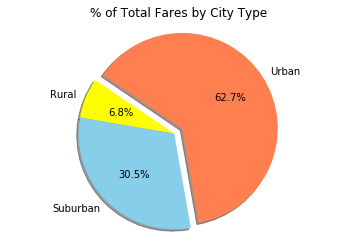

In [5]:
# Calculate Type Percents
urban_fares=urban_df["Total Fare"].sum()/pyber_final["Total Fare"].sum()*100
suburban_fares=suburban_df["Total Fare"].sum()/pyber_final["Total Fare"].sum()*100
rural_fares=rural_df["Total Fare"].sum()/pyber_final["Total Fare"].sum()*100

city_fares=[urban_fares, rural_fares, suburban_fares]
labels=["Urban", "Rural", "Suburban"]
explode=[0.1, 0, 0]
colors=['coral', 'yellow', 'skyblue']

# Build Pie Chart
plt.pie(city_fares, labels=labels, explode=explode, startangle=280, shadow=True, colors=colors, autopct="%1.1f%%")
plt.title("% of Total Fares by City Type")
plt.axis('equal')

# Save Figure
plt.savefig("Images/Total Fares by City Type.png")
plt.show()

## Total Rides by City Type

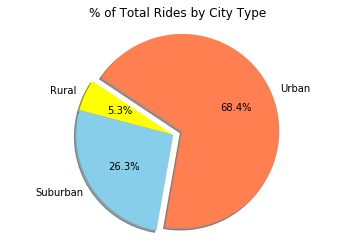

In [6]:
# Calculate Ride Percents
urban_rides=urban_df["Total Number of Rides"].sum()/pyber_final["Total Number of Rides"].sum()*100
suburban_rides=suburban_df["Total Number of Rides"].sum()/pyber_final["Total Number of Rides"].sum()*100
rural_rides=rural_df["Total Number of Rides"].sum()/pyber_final["Total Number of Rides"].sum()*100

city_rides=[urban_rides, rural_rides, suburban_rides]

# Build Pie Chart
plt.pie(city_rides, labels=labels, explode=explode, startangle=260, shadow=True, colors=colors, autopct="%1.1f%%")
plt.title("% of Total Rides by City Type")
plt.axis('equal')

# Save Figure
plt.savefig("Images/Total Rides by City Type.png")
plt.show()

## Total Drivers by City Type

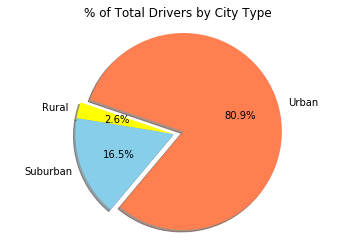

In [7]:
# Calculate Driver Percents
urban_drivers=urban_df["Driver Count"].sum()/pyber_final["Driver Count"].sum()*100
suburban_drivers=suburban_df["Driver Count"].sum()/pyber_final["Driver Count"].sum()*100
rural_drivers=rural_df["Driver Count"].sum()/pyber_final["Driver Count"].sum()*100

city_drivers=[urban_drivers, rural_drivers, suburban_drivers]

# Build Pie Charts
plt.pie(city_drivers, labels=labels, explode=explode, startangle=230, shadow=True, colors=colors, autopct="%1.1f%%")
plt.title("% of Total Drivers by City Type")
plt.axis('equal')

# Save Figure
plt.savefig("Images/Total Drivers by City Type.png")
plt.show()